In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

Coefficients: 
[[ 90000    300      1]
 [160000    400      1]
 [250000    500      1]]
Solution: 
[[ 0.00000115]
 [-0.001715  ]
 [ 1.027     ]]


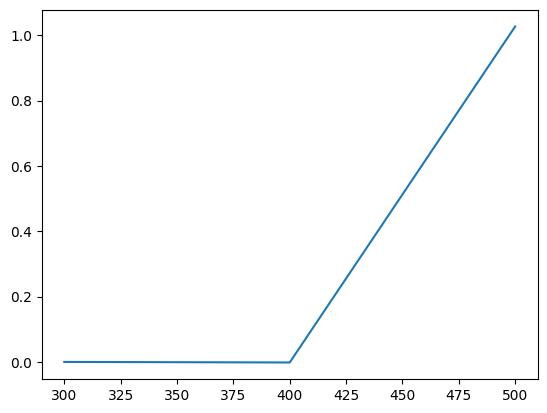

In [22]:
# Example 17.1
x = np.array([300, 400, 500])
f = np.array([0.616, 0.525, 0.457])[:, None]
n = len(x)

# Each pair can be substituted into eq 17.2 to yield a system of n equations
coefficients = np.repeat(x[:, None], n, axis=1)

# right to left, power by 0 to n-1
for i in range(n):
    coefficients[:, i] = np.power(x, n - i - 1)

print(f"Coefficients: \n{coefficients}")

# Solve the system of equations
solution = np.linalg.solve(coefficients, f)

# Print the solution
print(f"Solution: \n{solution}")

# Plot the solution
plt.plot(x, solution)
plt.show()

In [23]:
def newint(x, y, xx):
    """
        Newton Interpolation
        interpolating based on (x, y)
        xx: x values to be interpolated
        output: y values of interpolated function
    """

    n = len(x)
    assert len(y) == n, "x and y must be the same length"
    b = np.zeros((n, n))

    # assign dependent variables to the first column of b.
    b[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            b[i, j] = (b[i + 1, j - 1] - b[i, j - 1]) / (x[i + j] - x[i])

    # use the finite divided differences to interpolate
    xt = np.ones(len(xx))
    yint = b[0, 0] * np.ones(len(xx))

    for j in range(n - 1):
        xt = xt * (xx - x[j])
        yint = yint + b[0, j + 1] * xt

    return yint